clustering : 군집화 (특징이 유사한 데이터들끼리 묶어줌)

- kmeans : 분할 기반 클러스터링

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [45]:
iris = load_iris()

# 우리는 지금 iris datasets 에서 target이 없다고 가정
iris_target_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))

iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
model = KMeans(n_clusters=3, n_init="auto", random_state=1)

In [47]:
model.fit(iris_df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [48]:
# 각 데이터의 라벨링
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [49]:
# 중심점 좌표
model.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [50]:
# 데이터와 클러스터 중심까지의 거리 합
model.inertia_
# 값이 작을수록 군집이 잘 됨.

78.85566582597731

In [51]:
predict = model.predict(iris_df)

In [52]:
iris_df["target"] = iris.target
iris_df["predict"] = predict
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [53]:
iris_df.groupby(["target", "predict"])["sepal_length"].count()

target  predict
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

적절한 k개를 찾는 두가지 방법
1) elbow graph
2) silhouette coefficient

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [55]:
# 2차원으로 바꿔서 시각화
iris_pca = PCA(n_components=2).fit_transform(iris.data)

iris_df["pca_1"] = iris_pca[:, 0]
iris_df["pca_2"] = iris_pca[:, 1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


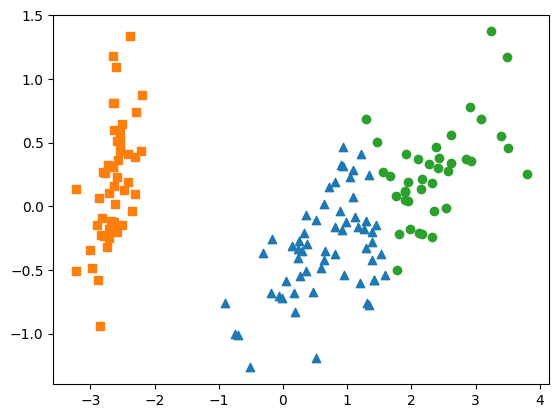

In [56]:
marker_idx = [iris_df[iris_df["predict"] == i].index for i in range(3)]
markers = ["^", "s", "o"]

for i in range(len(marker_idx)):
    plt.scatter(x=iris_df.loc[marker_idx[i], "pca_1"],
                y = iris_df.loc[marker_idx[i], "pca_2"],
                marker=markers[i])
    
plt.show()

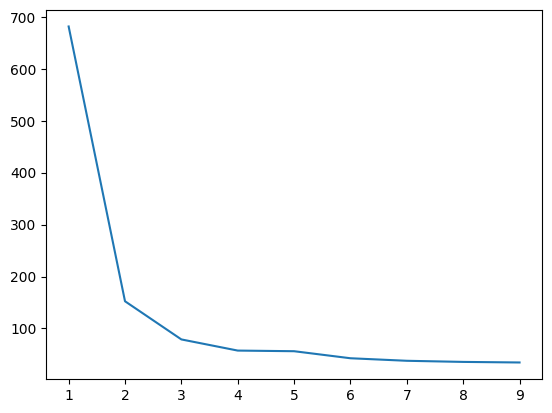

In [58]:
inertia_list = list()

for i in range(1, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    inertia_list.append(model.inertia_)

# x: cluster 갯수
# y: inertia 값
# elbow graph : 적절한 k의 값을 찾기위해 k를 변화시켜보자
# -> inertia의 변화가 급격한 부분이 적절한 k이다
plt.plot(range(1, 10), inertia_list)

검사하지않는 숙제 : KMeans애서 n_init="auto" 파라미터가 뭔지 공식문서 꼭 보기

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
# silhouette_samples : 데이터 각각의 실루엣 계수
# silhouette coefficiet : (실루엣 계수) 각 군집간의 거리가 얼마나 효율적으로 분리되어있는지 판별
# (값이 높을수록 좋다)

silhouette_coef = silhouette_samples(iris.data, iris_df["predict"])
iris_df["silhouette_coef"] = silhouette_coef
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2,silhouette_coef
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852582
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.814916
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.828797
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.804352
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.848918
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,0.424561
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,0.103125
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,0.316810
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,0.347855


In [63]:
silhouette_avg = silhouette_score(iris.data, iris_df["predict"])

# silhouette_score : 전체 데이터의 실루엣 계수 평균
silhouette_avg
# 높을수록 좋음

0.5511916046195919

In [64]:
silhouette_score_list = list()

for i in range(2, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    silhouette_score_list.append(silhouette_score(iris.data, model.labels_))

silhouette_score_list

[0.6810461692117462,
 0.5511916046195919,
 0.49535632852884987,
 0.44207674329916935,
 0.4424630109484251,
 0.4609474109834492,
 0.4513998322873973,
 0.417849970364608]

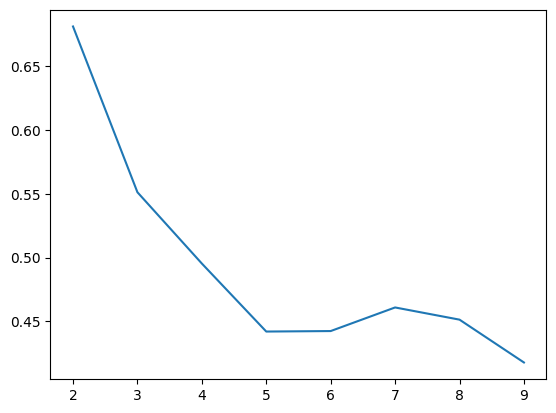

In [66]:
plt.plot(range(2, 10), silhouette_score_list)
# k가 몇일때 점수가 가장 높은가

In [67]:
import numpy as np

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm 
    import math
    
    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
          
    for ind, n_cluster in enumerate(cluster_lists):
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

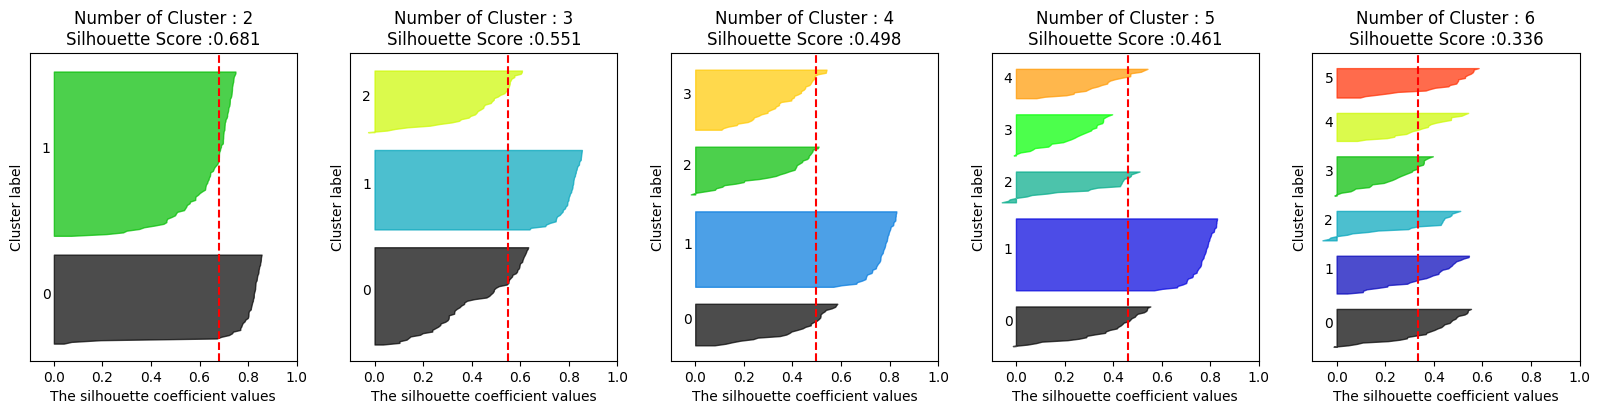

In [68]:
visualize_silhouette([2, 3, 4, 5, 6], iris.data)